In [24]:
import pandas as pd
import numpy as np
from scipy.stats import norm 
import nltk
import json
import ast
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import r_regression
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Sasaki\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Sasaki\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Sasaki\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Sasaki\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\Sasaki\AppData\Roaming\nltk_data...
[nltk_data] 

True

In [25]:
# how standardized test scores, GPA, and other factors affect college enrollment

# Initialize csv
col_interest = pd.read_csv('levelOfInterestInCollege.csv')

# Convert the will_go_to_college column to ones and zeros, ones=True zero=False
col_interest['will_go_to_college'] = col_interest['will_go_to_college'].apply(lambda x: 1 if x else 0)

92.0% of students with an average grade higher than 85.57 went to college
Only 28.0% of students with an average grade below 85.57 went to college
Median grade: 85.575


,Higher than 85.57,Lower than 85.57
0,92.0,28.0


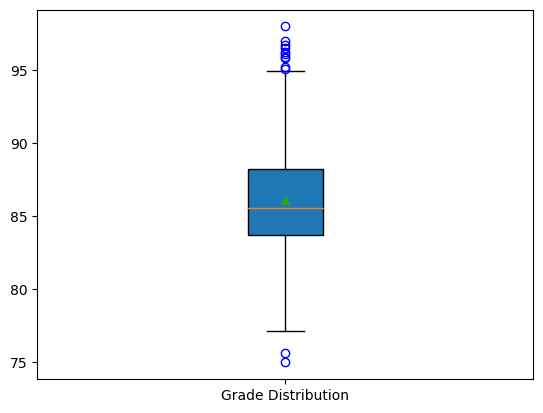

In [26]:
# Question: Is there some correlation between higher average grade and going to college

# Take the average and will go to college columns
avg_grades = col_interest['average_grades']
will_college = col_interest['will_go_to_college']


avg_grade_median = col_interest['average_grades'].median()

# Seperate the grades into quartiles and find the frequencies of the will_go_to_college columns
# For each quartile.
avg_q1 = col_interest.loc[avg_grades < avg_grades.quantile(0.25)]
avg_q3 = col_interest.loc[avg_grades > avg_grades.quantile(0.75)]

avg_q3_freq = round((avg_q3['will_go_to_college'].sum() / len(avg_q3['will_go_to_college'])) * 100, 4)
avg_q1_freq = round((avg_q1['will_go_to_college'].sum() / len(avg_q1['will_go_to_college'])) * 100, 4)

# Plot a boxplot of the avg grade distribution
plt.boxplot(avg_grades, showmeans=True, labels=['Grade Distribution'], patch_artist=True, flierprops=dict(color='blue', markeredgecolor='blue'))

print(f"{avg_q3_freq}% of students with an average grade higher than 85.57 went to college")
print(f"Only {avg_q1_freq}% of students with an average grade below 85.57 went to college")
print("Median grade:", round(avg_grade_median, 4))

# Store into dataframe
pd.DataFrame({"Higher than 85.57": [round(avg_q3_freq, 4)], "Lower than 85.57": [round(avg_q1_freq, 4)]})

78.8% of students with parents who have a salary of $5440000.0 or below made it to college
Only 14.46% of students with parents who have a salary of $5440000.0 or below made it to college
Median grade: 5440000.0


,Higher than 5440000.0,Lower than 5440000.0
0,0.788,0.1446


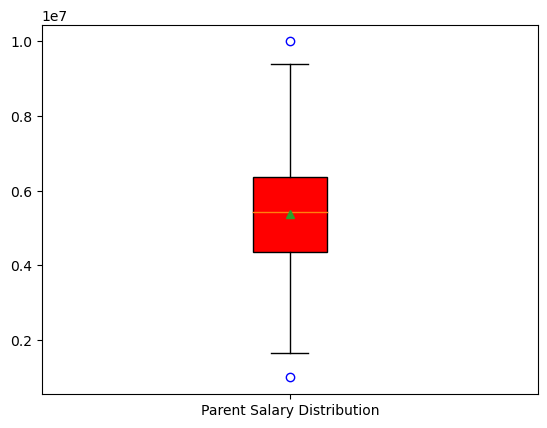

In [27]:

# Get salary and college columns
avg_salary = col_interest['parent_salary']
will_college = col_interest['will_go_to_college']

# Find the median parent salary
avg_salary_median = col_interest['parent_salary'].median()

# Divide the parent salaries into quartiles
avg_q1 = col_interest.loc[avg_salary < avg_salary.quantile(0.25)]
avg_q3 = col_interest.loc[avg_salary > avg_salary.quantile(0.75)]

# Calculate the frequencies
avg_q1_freq = avg_q1['will_go_to_college'].sum() / len(avg_q1['will_go_to_college'])
avg_q3_freq = avg_q3['will_go_to_college'].sum() / len(avg_q3['will_go_to_college'])

# Plot boxplot 
plt.boxplot(avg_salary, showmeans=True, labels=['Parent Salary Distribution'], patch_artist=True, boxprops=dict(facecolor="red"),flierprops=dict(color='blue', markeredgecolor='blue'))

print(f"{round(avg_q3_freq * 100, 2)}% of students with parents who have a salary of ${avg_salary_median} or below made it to college")
print(f"Only {round(avg_q1_freq * 100, 2)}% of students with parents who have a salary of ${avg_salary_median} or below made it to college")
print("Median grade:", round(avg_salary_median, 4))

pd.DataFrame({f"Higher than {avg_salary_median}": [round(avg_q3_freq, 4)], f"Lower than {avg_salary_median}": [round(avg_q1_freq, 4)]})

In [28]:
# What is the percentage of students who made it to college by their interest in going to college?

# Calculate frequencies based on interest, uncertain, and not interested

# Very interested, Less interested, Interested were grouped up to just form interested for simplicity.
interested = col_interest.loc[col_interest['interest'].isin(['Very Interested','Less Interested', 'Interested'])]['will_go_to_college'].sum() / len(col_interest)
not_interested = col_interest.loc[col_interest['interest'] == 'Not Interested']['will_go_to_college'].sum() / len(col_interest)
uncertain = col_interest.loc[col_interest['interest'] == 'Uncertain']['will_go_to_college'].sum() / len(col_interest)

# Store data in dataframe
chart = pd.DataFrame({"interest": ["Interested", "Not Interested", "Uncertain"], "Percentage in college": [interested, not_interested, uncertain]})
display(chart)

,interest,Percentage in college
0,Interested,0.296
1,Not Interested,0.046
2,Uncertain,0.158


,Positive,Uncertain,Negative
0,0.153376,0.143123,0.7035


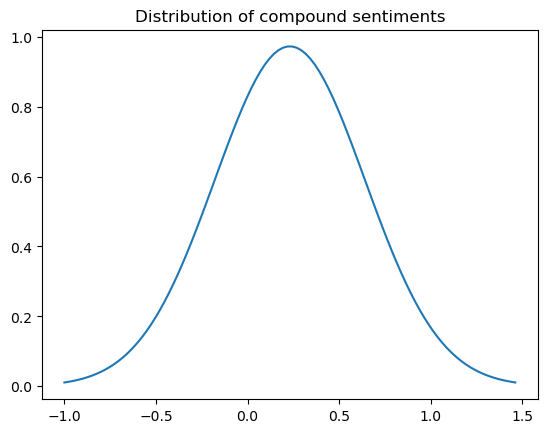

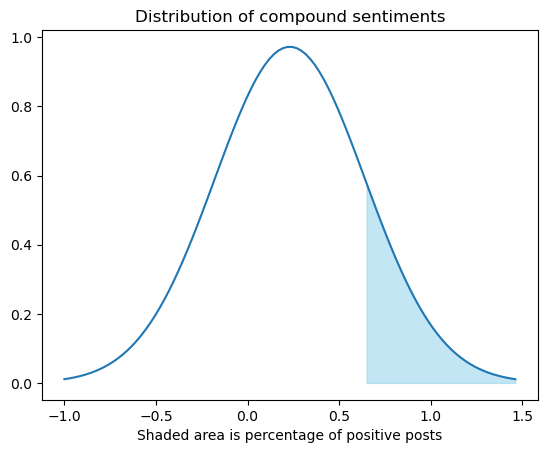

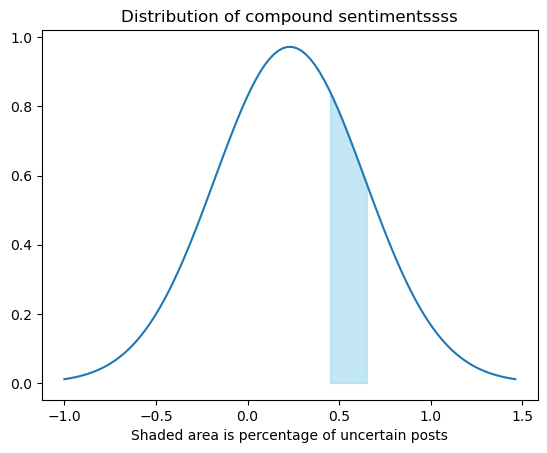

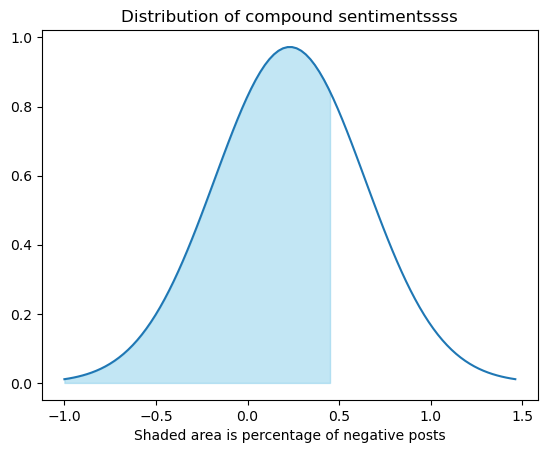

In [29]:
# Is there a relation between the sentiment on college and standardized test related subreddits and a students decision to go to college

# Assume the compound sentiments are normally distributed, then use that to estimate the true proportion of post sentiments

# In relation to the above data and to determine how this will affect college enrollment
# Post sentiment and interest will have the following correlation.

# Positive -> Interested
# Negative -> Not interested
# Neutral -> Uncertain

# The range for the compound proportion for differentiating between sentiments
# Neutral comp: [0.45-0.65]
# Negative compoudn: <0.45
# Positive compound: >0.65


text_df = pd.read_csv('Sat.csv')

sia = SentimentIntensityAnalyzer()

scores = []
# Take a random sample of 1000 posts
for post in text_df['tokens'].sample(1000):
    scores.append(sia.polarity_scores(' '.join(ast.literal_eval(post))))

compound_list = []
for comp in scores:
    compound_list.append((comp['compound']))
compound_list = pd.Series(compound_list)

compound_mean = compound_list.mean()
compound_std = compound_list.std(ddof=1)

# Assumption, those with positive posts on college subreddits most likely did well on the SAT or other standardized tests and
# Are as well interested in going to college
# Predict the percentage of posts by students that likely made it to college
likely_college = 1 - norm.cdf(0.65, compound_mean, compound_std)
uncertain = norm.cdf(0.65, compound_mean, compound_std) - norm.cdf(0.45, compound_mean, compound_std)
unlikey_college = norm.cdf(0.45, compound_mean, compound_std)

percentage_sentiment = pd.DataFrame({"Positive": [likely_college], "Uncertain": [uncertain], "Negative": [unlikey_college]})

display(percentage_sentiment)


# Plot a normal distribution
x = np.linspace(compound_mean - 3 * compound_std, compound_mean + 3 * compound_std, 100)

# Create four plots for shading 
fig, ax = plt.subplots()

fig2, ax2 = plt.subplots()

fig3, ax3 = plt.subplots()

fig4, ax4 = plt.subplots()

# Create ranges for shading
likely_shade = np.linspace(0.65, compound_mean + 3 * compound_std, 100)
uncertain_shade = np.linspace(0.45, 0.65, 100)
unlikely_shade = np.linspace(0.45, compound_mean - 3 * compound_std, 100)

# Plot all 4 graphs
ax.plot(x, norm.pdf(x, compound_mean, compound_std))
ax.set(title='Distribution of compound sentiments')

ax2.plot(x, norm.pdf(x, compound_mean, compound_std))
ax2.set(title='Distribution of compound sentiments', xlabel='Shaded area is percentage of positive posts')
ax2.fill_between(likely_shade, norm.pdf(likely_shade, compound_mean, compound_std), color='skyblue', alpha=0.5)

ax3.plot(x, norm.pdf(x, compound_mean, compound_std))
ax3.set(title='Distribution of compound sentimentssss', xlabel='Shaded area is percentage of uncertain posts')
ax3.fill_between(uncertain_shade, norm.pdf(uncertain_shade, compound_mean, compound_std), color='skyblue', alpha=0.5)

ax4.plot(x, norm.pdf(x, compound_mean, compound_std))
ax4.set(title='Distribution of compound sentimentssss', xlabel='Shaded area is percentage of negative posts')
ax4.fill_between(unlikely_shade, norm.pdf(unlikely_shade, compound_mean, compound_std), color='skyblue', alpha=0.5)
